In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [229]:
df=pd.read_csv('bank-additional-full.csv', delimiter=';')

In [230]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null object
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null object
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(3), int64(5), object(13)
memory usage

In [232]:
#rename dependant variable (product_bought instead of 'y')
df['product_bought']=df['y']

In [233]:
#remove 'y' column after renaming
df.drop('y', axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,product_bought
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [234]:
#check unique values in the education column before modifying
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [235]:
#remove unneccessary string elements from the education column
def education_(x):
    if '.4y' in x:
        return x.split('.')[0]
    elif '.6y' in x:
        return x.split('.')[0]
    elif '.9y' in x:
        return x.split('.')[0]
    else:
        return x

In [236]:
#apply the education_ function
df['education']=df['education'].apply(education_)

In [237]:
#check unique values in the education column after modifying
df['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [238]:
def to_num(x):
    if 'yes' in x:
        return 1
    elif 'no' in x:
        return 0
    else:
        return x

In [239]:
#'no' = '0'
#'yes' = '1'
df['product_bought']=df['product_bought'].apply(to_num)

In [240]:
#check level of education after modification
df['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [241]:
#check the campaigns success(how many customers have bought the offered product?)
df['product_bought'].value_counts()

0    36548
1     4640
Name: product_bought, dtype: int64

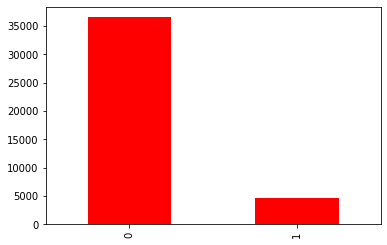

In [242]:
#Overview (bought product/did not buy product)
df['product_bought'].value_counts().plot(kind='bar', color='r')

In [243]:
#gain insights about product buying behaviour (for numeric columns)
df.groupby('product_bought').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
product_bought,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,93.603757,-40.593097,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,93.354386,-39.789784,5095.115991


In [244]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,product_bought
job,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,93.534054,-40.245433,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,93.656656,-41.375816,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,93.605372,-41.283654,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,93.676576,-39.495283,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,93.522755,-40.489466,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,93.430786,-38.573081,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,93.559982,-40.488107,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,93.634659,-41.290048,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,93.331613,-40.187543,5085.939086,0.314286


Text(0, 0.5, 'Purchase Frequency')

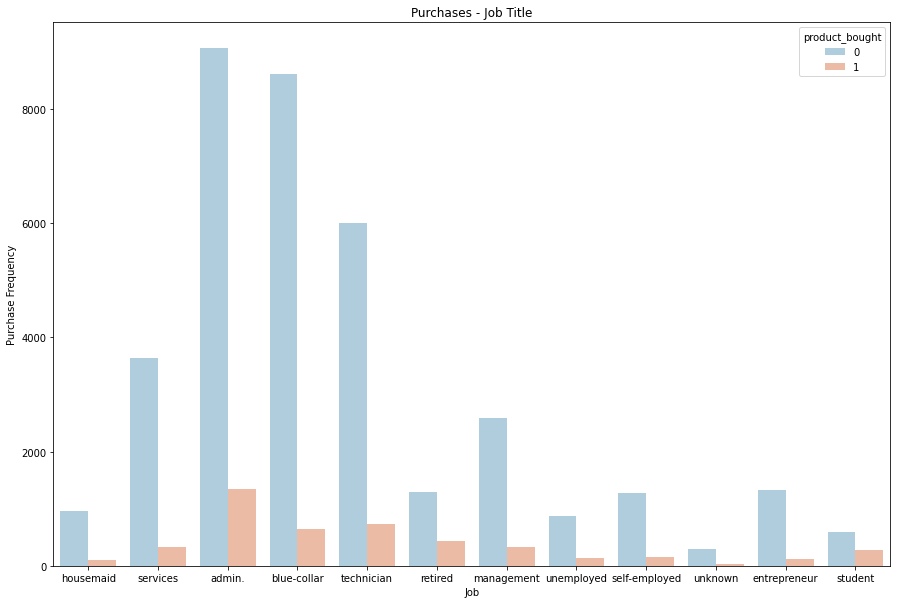

In [245]:
#visualize the purchases depending on the job title
plt.figure(figsize=(15,10))
sns.countplot(x='job', hue='product_bought' ,data=df, palette='RdBu_r')
plt.title('Purchases - Job Title')
plt.xlabel('Job')
plt.ylabel('Purchase Frequency')

In [246]:
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,product_bought
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,01. Jan,93.994,-36.4,4.857,5191.0,no,0


Text(0, 0.5, 'Purchase Frequency')

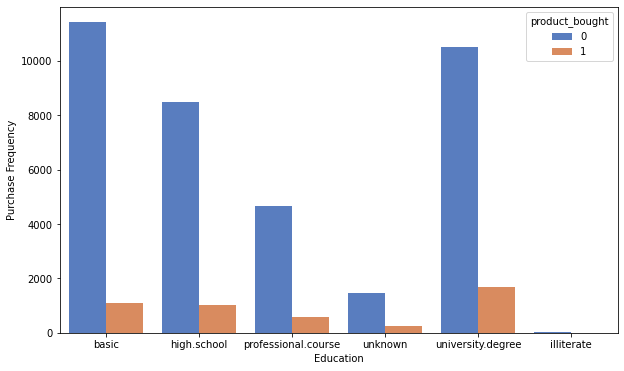

In [247]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='product_bought' ,data=df, palette='muted')
plt.xlabel('Education')
plt.ylabel('Purchase Frequency')

<Figure size 720x432 with 0 Axes>

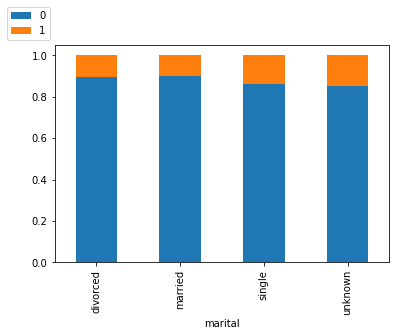

In [248]:
plt.figure(figsize=(10,6))
table=pd.crosstab(df.marital, df.product_bought)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(0, 1), loc='lower right', ncol=1)

In [249]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [250]:
df.drop('y', axis=1, inplace=True)

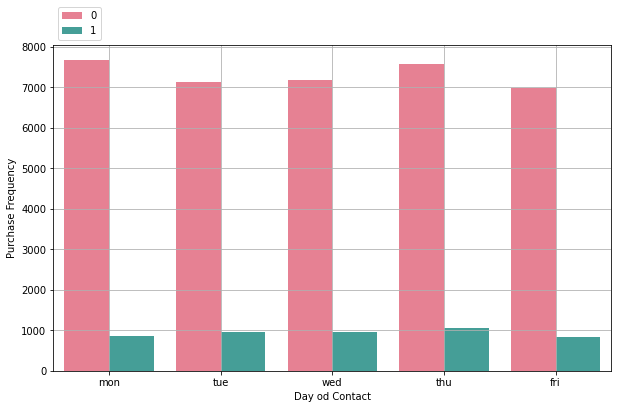

In [251]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', hue='product_bought' ,data=df, palette='husl')
plt.xlabel('Day od Contact')
plt.ylabel('Purchase Frequency')
plt.legend(bbox_to_anchor=(0, 1), loc='lower left', ncol=1)
plt.grid()

In [252]:
#Python doesnt take text values as input
#Transform categorical variables to numerical variables
#Python uses internally numpy array
#OneHotEncoding

df=pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null object
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null object
nr.employed                      41188 non-null float64
product_bought                   41188 non-null int64
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed  

In [254]:
df.shape

(41188, 52)

In [255]:
df.values

array([[56, 261, 1, ..., 0, 1, 0],
       [57, 149, 1, ..., 0, 1, 0],
       [37, 226, 1, ..., 0, 1, 0],
       ...,
       [56, 189, 2, ..., 0, 1, 0],
       [44, 442, 1, ..., 0, 1, 0],
       [74, 239, 3, ..., 0, 0, 0]], dtype=object)

In [256]:
df_final_vars=df.columns.to_list()

In [257]:
df_final_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'product_bought',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [258]:
#Differentiating between dependent and independent variable

# X= dependent variables
X=df.drop(['product_bought', 'emp.var.rate', 'euribor3m'],axis=1)
# y= independent variable
y=df['product_bought']

In [259]:
#X-columns
X

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,94.767,-50.8,4963.6,1,0,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,94.767,-50.8,4963.6,0,0,...,0,1,0,0,0,0,0,0,1,0


In [260]:
#Y-columns
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: product_bought, Length: 41188, dtype: int64

In [261]:
import sys

In [200]:
!{sys.executable} -m pip install imbalanced-learn

In [262]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os=SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns=X_train.columns

In [263]:
os_data_X, os_data_y=os.fit_sample(X_train, y_train)
os_data_X= pd.DataFrame(data=os_data_X, columns=columns)
os_data_y=pd.DataFrame(data=os_data_y, columns=['product_bought'])
print('length of oversampled data is' , len(os_data_X))

length of oversampled data is 48984


In [264]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,01. Jan,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,01. Jan,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,01. Jan,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,01. Jan,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,01. Jan,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [265]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 49 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
nr.employed                      41188 non-null float64
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician       

In [266]:
#RFE- Recursive Feature Elimination
y=['product_bought']
X=df.drop(['product_bought', 'emp.var.rate', 'euribor3m'],axis=1)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,20)
rfe=rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\aschlee\AppData\Local\Continuum\anaconda3-1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL N

[False False False False False False False False  True  True  True False
 False  True  True False False  True  True False False False  True False
  True  True  True False False False False False False  True  True False
  True False False False  True False False  True  True  True  True False
  True]
[24 23 18 25 16 20 21 22  1  1  1  3  4  1  1 27  5  1  1  8  7 26  1 29
  1  1  1  6 30 13 14 10 11  1  1 28  1  9 19  2  1 17 12  1  1  1  1 15
  1]


In [267]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [274]:
cols=['job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_self-employed',
       'job_services'  ,'job_unemployed','job_unknown','education_high.school','education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_telephone', 'month_aug','month_jul','month_nov','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success' ]
X=os_data_X[cols]
y=os_data_y['product_bought']

In [275]:
#Implementing Logistic Regression Model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.518590
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.252     
Dependent Variable:      product_bought       AIC:                  50845.2629
Date:                    2020-07-20 09:11     BIC:                  51021.2479
No. Observations:        48984                Log-Likelihood:       -25403.   
Df Model:                19                   LL-Null:              -33953.   
Df Residuals:            48964                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [276]:
#remove every column where p>0.05
cols1=['job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_self-employed',
       'job_services'  ,'job_unemployed','job_unknown','education_high.school','education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_telephone', 'month_aug','month_nov','day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_success' ]
X1=os_data_X[cols1]
y1=os_data_y['product_bought']

In [277]:
#Running Logistic Regression Model after removing columns (p>0.05)
logit_model=sm.Logit(y1,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.518604
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.252     
Dependent Variable:      product_bought       AIC:                  50844.6134
Date:                    2020-07-20 09:11     BIC:                  51011.7992
No. Observations:        48984                Log-Likelihood:       -25403.   
Df Model:                18                   LL-Null:              -33953.   
Df Residuals:            48965                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
logreg=LogisticRegression()

In [280]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [281]:
logreg.fit(X1_train, y1_train)

LogisticRegression()

In [283]:
y1_pred=logreg.predict(X1_test)

In [289]:
#accuracy score
print(logreg.score(X1_test, y1_test))

0.8666872873492113


In [290]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y1_test,y1_pred)
print(confusion_matrix)

[[7151  895]
 [1260 6859]]


In [291]:
#Interpretation Confusion Matrix
# 7151= True positive
# 895= False Positive
# 1260= False Negative
# 6859= True Negative

In [292]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      8046
           1       0.88      0.84      0.86      8119

    accuracy                           0.87     16165
   macro avg       0.87      0.87      0.87     16165
weighted avg       0.87      0.87      0.87     16165

